In [1]:
import pandas as pd
import os
import requests
import json
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [2]:
def get_data(keyword,raw_data):
    records_for_jobcode = []
    n_len = len(raw_data['SearchResult']['SearchResultItems'])
    for n_loop in range(0,n_len):   
        keyword = keyword
        position_id = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionID']
        Position_Title = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionTitle']
        PositionStartDate = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionStartDate']
        PositionEndDate = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionEndDate']
        position_location_len = len(raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionLocation'])
        position_locations = []
        for n_loc in range(0,position_location_len):
            location_name = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionLocation'][n_loc]['LocationName']
            position_locations.append(location_name)
        #print(position_locations)    
        DepartmentName = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['DepartmentName']
        OrganizationName = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['OrganizationName']
        agency = DepartmentName + ' - ' + OrganizationName
        job_summary = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['JobSummary']
        QualificationSummary = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['QualificationSummary']
        majorduties_len = len(raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['MajorDuties'])
        major_duties = []
        for n_md in range(0,majorduties_len):
            majorduties = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['MajorDuties'][n_md]
            major_duties.append(majorduties)
        #print(major_duties)    
        Education = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['Education']
        Evaluations = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['Evaluations']
        Job_URL = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['PositionURI']
        job_extracted_date = datetime.today().strftime('%Y-%m-%d')
        Code = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['JobGrade'][0]['Code']
        HighGrade = raw_data['SearchResult']['SearchResultItems'][n_loop]['MatchedObjectDescriptor']['UserArea']['Details']['HighGrade']
        pay_grade = Code + '-' + HighGrade
        
        record = (keyword,agency,position_id,Position_Title,PositionStartDate,PositionEndDate,position_locations,job_summary,QualificationSummary,major_duties,Education,Evaluations,Job_URL,job_extracted_date,pay_grade)
        
        records_for_jobcode.append(record)     
    writer.writerows(records_for_jobcode)

In [3]:
API_host = 'data.usajobs.gov'
API_email = 'xxxx'
API_key = 'yyy'
    
with open(r'usajobs_results_cyber.csv','w',newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['keyword','agency','position id','Position Title','Position Start Date','Position End Date','Position Locations','job summary','Qualification Summary','major duties','Education','Evaluations','Job URL','job_extracted_date','pay_grade'])
        
    for keyword in ['cyber','information security','information security specialist','infosec']:
        #'cyber','information security','information security specialist','infosec','Data Analyst cyber','Database Administrator','Enterprise Architect','Executive Cyber Leadership','Exploitation Analyst','Information Systems Security Developer','Information Systems Security Manager','IT Investment/Portfolio Manager','IT Program Auditor','IT Project Manager','Knowledge Manager IT','Law Enforcement Forensics Analyst','Counterintelligence Forensics Analyst','Mission Assessment Specialist','Network Operations Specialist','Privacy Officer/Privacy Compliance Manager',
        #'Product Support Manager','Program Manager cyber','Research & Development Specialist cyber','Secure  software','Security Architect','Security Control Assessor','Software Developer cyber','cyber System Administrator','System Testing and Evaluation Specialist cyber','Systems Developer','Cyber Systems Requirements Planner','Systems Security Analyst','Target Network Analyst','Technical Support Specialist cyber','Cyber Threat Analyst','Vulnerability Assessment Analyst'
        try:
            API_URL = ('https://data.usajobs.gov/api/search?Keyword='+keyword+'&ResultsPerPage=4500')
            print(API_URL)    

            API_head = {'Host':API_host,'User-Agent':API_email,'Authorization-Key':API_key}
            API_req = requests.get(API_URL,headers=API_head)
            raw_data = API_req.json()
            file_name = str(keyword)+'_rawdata.json'
            with open(file_name, 'a') as f:
                json.dump(raw_data, f)

            n_len = len(raw_data['SearchResult']['SearchResultItems'])
            #count = raw_data['SearchResult']['SearchResultCountAll']
            print('Search found '+str(n_len)+' for the given keyword :'+ str(keyword))

            get_data(keyword,raw_data)
        except:
            pass

https://data.usajobs.gov/api/search?Keyword=cyber&ResultsPerPage=4500
Search found 433 for the given keyword :cyber
https://data.usajobs.gov/api/search?Keyword=information security&ResultsPerPage=4500
Search found 2449 for the given keyword :information security
https://data.usajobs.gov/api/search?Keyword=information security specialist&ResultsPerPage=4500
Search found 502 for the given keyword :information security specialist
https://data.usajobs.gov/api/search?Keyword=infosec&ResultsPerPage=4500
Search found 1348 for the given keyword :infosec


In [4]:
df= pd.read_csv('usajobs_results_cyber.csv')
df.head(3)

,keyword,agency,position id,Position Title,Position Start Date,Position End Date,Position Locations,job summary,Qualification Summary,major duties,Education,Evaluations,Job URL,job_extracted_date,pay_grade
0,cyber,Department of Defense - Defense Information Sy...,CES-11591793-22LP,ELECTRONICS ENGINEER (CYBER),2022-08-04T00:00:00.0000,2022-08-12T23:59:59.9970,"['Scott AFB, Illinois']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...","['Analyzes, designs, engineers, integrates and...",There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-13
1,cyber,Department of the Air Force - Defense Cyber Cr...,9L-AFPC-11589433-689483-TRC,IT CYBERSECURITY SPECIALIST (INFOSEC),2022-08-01T00:00:00.0000,2022-08-12T23:59:59.9970,"['Linthicum Heights, Maryland']","Click on ""Learn more about this agency"" button...","In order to qualify, you must meet the special...","['Plans, executes, manages, and debriefs inter...",NaN,"Your application package (resume, supporting d...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GS-13
2,cyber,Department of Defense - Defense Information Sy...,CES-11596598-22MJC,IT CYBERSECURITY SPECIALIST (INFOSEC),2022-08-09T00:00:00.0000,2022-08-19T23:59:59.9970,"['Mechanicsburg, Pennsylvania']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...","['Conduct system security evaluations, audits,...",There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-12


In [5]:
df.columns

Index(['keyword', 'agency', 'position id', 'Position Title',
       'Position Start Date', 'Position End Date', 'Position Locations',
       'job summary', 'Qualification Summary', 'major duties', 'Education',
       'Evaluations', 'Job URL', 'job_extracted_date', 'pay_grade'],
      dtype='object')

In [6]:
df = df.drop(['keyword'], axis=1)

In [7]:
df

,agency,position id,Position Title,Position Start Date,Position End Date,Position Locations,job summary,Qualification Summary,major duties,Education,Evaluations,Job URL,job_extracted_date,pay_grade
0,Department of Defense - Defense Information Sy...,CES-11591793-22LP,ELECTRONICS ENGINEER (CYBER),2022-08-04T00:00:00.0000,2022-08-12T23:59:59.9970,"['Scott AFB, Illinois']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...","['Analyzes, designs, engineers, integrates and...",There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-13
1,Department of the Air Force - Defense Cyber Cr...,9L-AFPC-11589433-689483-TRC,IT CYBERSECURITY SPECIALIST (INFOSEC),2022-08-01T00:00:00.0000,2022-08-12T23:59:59.9970,"['Linthicum Heights, Maryland']","Click on ""Learn more about this agency"" button...","In order to qualify, you must meet the special...","['Plans, executes, manages, and debriefs inter...",NaN,"Your application package (resume, supporting d...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GS-13
2,Department of Defense - Defense Information Sy...,CES-11596598-22MJC,IT CYBERSECURITY SPECIALIST (INFOSEC),2022-08-09T00:00:00.0000,2022-08-19T23:59:59.9970,"['Mechanicsburg, Pennsylvania']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...","['Conduct system security evaluations, audits,...",There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-12
3,Department of Defense - Defense Information Sy...,CES-11575918-22LP,IT CYBERSECURITY SPECIALIST (NETWORK/INFOSEC),2022-08-08T00:00:00.0000,2022-08-15T23:59:59.9970,"['Whitehall, Ohio', 'Tinker AFB, Oklahoma']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...","['Providing support in the planning, design, d...",There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-13
4,Department of Defense - Defense Information Sy...,CES-11600647-22LB,IT CYBERSECURITY SPECIALIST (CUSTSPT/INFOSEC),2022-08-05T10:22:48.6470,2022-08-11T23:59:59.9970,"['Joint Base Anacostia-Bolling, District of Co...",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...",['Serves as the senior technical analyst and r...,There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4727,Department of Veterans Affairs - Veterans Heal...,CBSY-11602723-22-BS,Dietitian,2022-08-08T00:00:00.0000,2022-08-29T23:59:59.9970,"['Fort Meade, South Dakota', 'Hot Springs, Sou...",Highly qualified candidates may be eligible fo...,Applicants pending the completion of education...,"[""Major duties include, but are not limited to...",IMPORTANT: A transcript must be submitted with...,"IN DESCRIBING YOUR EXPERIENCE, PLEASE BE CLEAR...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GS-11
4728,Department of Veterans Affairs - Veterans Heal...,CBSV-11573643-22-AH,Dietitian,2022-08-09T11:25:11.8830,2022-08-29T23:59:59.9970,"['Vancouver, Washington']","This position is assigned to HBPC, which provi...",Basic Requirements: United States Citizenship ...,"[""1. Conducts a comprehensive nutritional asse...",IMPORTANT: A transcript must be submitted with...,"IN DESCRIBING YOUR EXPERIENCE, PLEASE BE CLEAR...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GS-11
4729,Department of Veterans Affairs - Veterans Heal...,CAYV-11552825-22-ST,Criminal Investigator,2022-07-26T09:38:10.8670,2022-08-16T23:59:59.9970,"['Buffalo, New York']",This

In [8]:
df = df.drop_duplicates()

In [9]:
df

,agency,position id,Position Title,Position Start Date,Position End Date,Position Locations,job summary,Qualification Summary,major duties,Education,Evaluations,Job URL,job_extracted_date,pay_grade
0,Department of the Air Force - AFELEM US CYBER ...,9L-CES-11579656-690324-DP,SUPERVISORY CYBER POLICY PLANS AND PROGRAMS,2022-07-20T00:00:00.0000,2022-08-02T23:59:59.9970,"['Fort Meade, Maryland']","Click on ""Learn more about this agency"" button...","In order to qualify, you must meet the experie...","[""Exercises the full range of senior superviso...",NaN,"Your application package (resume, supporting d...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-07-21,GG-15
1,Department of the Air Force - AFELEM US CYBER ...,9L-CES-11576487-695132-RH,CYBER OPERATIONS PLANS ANALYST,2022-07-21T00:00:00.0000,2022-08-03T23:59:59.9970,"['Fort Meade, Maryland']",OPEN TO THE PUBLIC The primary purpose of this...,"In order to qualify, you must meet the special...","[""1. Planning, Policy, and Partnership Analyse...",NaN,"Your application package (resume, supporting d...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-07-21,GG-12
2,Department of the Air Force - AFELEM US CYBER ...,9L-CES-11575182-684131-DP,IT CYBERSECURITY SPECIALIST (INFOSEC),2022-07-15T00:00:00.0000,2022-07-28T23:59:59.9970,"['Fort Meade, Maryland']","Click on ""Learn more about this agency"" button...","In order to qualify, you must meet the experie...",['Serves as a Cyberspace Capabilities Planner ...,NaN,"Your application package (resume, supporting d...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-07-21,GG-13
3,Department of Defense - Organization of the Jo...,JCS-22-11556379-MP,PROGRAM AND MANAGEMENT ANALYST (CYBER),2022-07-11T07:32:31.4300,2022-07-25T23:59:59.9970,"['Pentagon, Arlington, Virginia']",This is a Cyber Excepted Service (CES) Positio...,"You may qualify at the GG-15, if you fulfill t...",['As a PROGRAM AND MANAGEMENT ANALYST (CYBER) ...,Substitution of education may not be used in l...,"Once the application process is complete, your...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-07-21,GG-15
4,Department of Defense - Defense Information Sy...,CES-11568207-22AH,IT CYBERSECURITY SPECIALIST (INFOSEC),2022-07-18T00:00:00.0000,2022-07-24T23:59:59.9970,"['Montgomery, Alabama', 'Tinker AFB, Oklahoma'...",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...",['Serves as a Cyber Incident Responder and Def...,There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-07-21,GG-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,Department of Veterans Affairs - Veterans Heal...,CBSV-11571884-22-LJ,Clinical Dietitian,2022-07-15T13:50:27.1970,2022-08-08T23:59:59.9970,"['White City, Oregon']","Responsible for independently planning, develo...",Basic Requirements: United States Citizenship ...,"[""The clinical dietitian will be involved in t...",IMPORTANT: A transcript must be submitted with...,"IN DESCRIBING YOUR EXPERIENCE, PLEASE BE CLEAR...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-07-21,GS-11
4880,Department of Veterans Affairs - Veterans Heal...,CBSU-11575268-22-RLS,Dietitian,2022-07-19T09:20:02.0930,2022-08-08T23:59:59.9970,"['Salt Lake City, Utah']",The Clinical Dietitian supports the facility's...,Applicants pending the completion of education...,"[""The clinical dietitian will be involved in t...",IMPORTANT: A transcript must be submitted with...,"IN DESCRIBING YOUR EXPERIENCE, PLEASE BE CLEAR...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-07-21,GS-11
4881,Department of Veterans Affairs - Veterans Heal...,CBSU-11575267-22-RLS,Dietitian,2022-07-19T09:20:46.6670,2022-08-08T23:59:59.9970,"['Salt Lake City, Utah']",The Clinical Dietitian supports the facility's...,Applicants pending the completion of education...,"[""The clinical dietitian will be i

In [9]:
df['job_desc']= df['job summary']+df['Qualification Summary']+df['major duties']+ df['Education']+ df['Evaluations']

C:\BigData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df = df.dropna(axis=0)

In [11]:
df_new = df.loc[((df['job_desc'].str.contains('cyber',case= False))|(df['job_desc'].str.contains('infosec',case= False))|(df['job_desc'].str.contains('information security',case= False)))
               &((~df['Position Title'].str.contains('diet',case= False))&(~df['Position Title'].str.contains('medical',case= False))&(~df['Position Title'].str.contains('health',case= False))&(~df['Position Title'].str.contains('dent',case= False))&(~df['Position Title'].str.contains('mechanic',case= False))&(~df['Position Title'].str.contains('nurse',case= False))&(~df['Position Title'].str.contains('technician',case= False))&(~df['Position Title'].str.contains('clinical',case= False))&(~df['Position Title'].str.contains('pharam',case= False))&(~df['Position Title'].str.contains('physician',case= False)))&(~df['Position Title'].str.contains('med',case= False))&(~df['Position Title'].str.contains('electrician',case= False))&(~df['Position Title'].str.contains('operator',case= False))&(~df['Position Title'].str.contains('attorney',case= False))&(~df['Position Title'].str.contains('procurement',case= False))&(~df['Position Title'].str.contains('assistant',case= False))&(~df['Position Title'].str.contains('physical',case= False))&(~df['Position Title'].str.contains('administrative',case= False))&(~df['Position Title'].str.contains('patrol',case= False))&(~df['Position Title'].str.contains('worker',case= False))&(~df['Position Title'].str.contains('resource',case= False))&(~df['Position Title'].str.contains('telecommunications',case= False))&(~df['Position Title'].str.contains('printing',case= False))&(~df['Position Title'].str.contains('maths',case= False))
               ]

In [12]:
df_new.to_csv(r'usajobs_results_cyber_cleaned.csv')

In [13]:
df_new['job_desc'] = df_new['job_desc'].astype(str)

C:\BigData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
import re


In [15]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    nltk.download('wordnet')
    stop=set(stopwords.words('english'))
    def preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            #news = [w.lower() for w in news]
            words=[w for w in word_tokenize(str(news)) if (w not in stop)]
            words = [w.lower() for w in words]
            words=[lem.lemmatize(w) for w in words if len(w)>2]
            words = re.sub(r'[^a-zA-Z0-9\- ]', '', str(words))
            #print(words)
            corpus.append(words)
        return corpus
    
    corpus=preprocess_text(text)
       
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS)
    
    wordcloud=wordcloud.generate(str(corpus))
    wordcloud.to_file("usajobs_allwords.png")

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


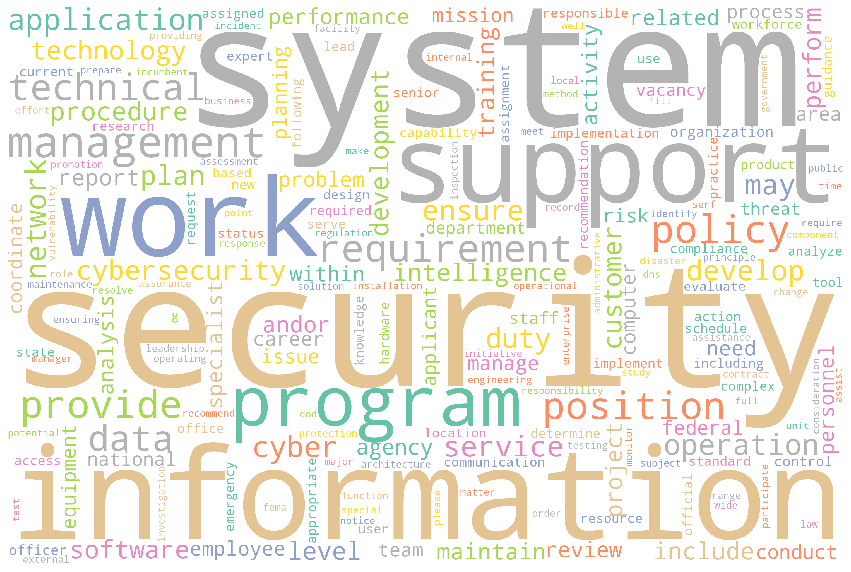

In [16]:
plot_wordcloud(df_new['major duties'])

In [17]:
df_new

,agency,position id,Position Title,Position Start Date,Position End Date,Position Locations,job summary,Qualification Summary,major duties,Education,Evaluations,Job URL,job_extracted_date,pay_grade,job_desc
0,Department of Defense - Defense Information Sy...,CES-11591793-22LP,ELECTRONICS ENGINEER (CYBER),2022-08-04T00:00:00.0000,2022-08-12T23:59:59.9970,"['Scott AFB, Illinois']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...","['Analyzes, designs, engineers, integrates and...",There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-13,This position is being recruited under 10 USC ...
2,Department of Defense - Defense Information Sy...,CES-11596598-22MJC,IT CYBERSECURITY SPECIALIST (INFOSEC),2022-08-09T00:00:00.0000,2022-08-19T23:59:59.9970,"['Mechanicsburg, Pennsylvania']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...","['Conduct system security evaluations, audits,...",There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-12,This position is being recruited under 10 USC ...
3,Department of Defense - Defense Information Sy...,CES-11575918-22LP,IT CYBERSECURITY SPECIALIST (NETWORK/INFOSEC),2022-08-08T00:00:00.0000,2022-08-15T23:59:59.9970,"['Whitehall, Ohio', 'Tinker AFB, Oklahoma']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...","['Providing support in the planning, design, d...",There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-13,This position is being recruited under 10 USC ...
4,Department of Defense - Defense Information Sy...,CES-11600647-22LB,IT CYBERSECURITY SPECIALIST (CUSTSPT/INFOSEC),2022-08-05T10:22:48.6470,2022-08-11T23:59:59.9970,"['Joint Base Anacostia-Bolling, District of Co...",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...",['Serves as the senior technical analyst and r...,There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-12,This position is being recruited under 10 USC ...
5,Department of Defense - Defense Information Sy...,CES-11571071-22AH,IT CYBERSECURITY SPECIALIST (DATAMGT/INFOSEC),2022-08-09T00:00:00.0000,2022-08-16T23:59:59.9970,"['Tinker AFB, Oklahoma']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...",['Install and configure new Microsoft SQL Serv...,There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GG-12,This position is being recruited under 10 USC ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,Department of Homeland Security - Customs and ...,CBPO VRA GS9 22-11,Customs and Border Protection Officer (VRA),2022-08-01T00:00:00.0000,2022-08-31T23:59:59.9970,"['Albuquerque, New Mexico', 'Oklahoma City, Ok...",The Department of Homeland Security (DHS) is c...,The qualification requirements listed below mu...,"[""As our nation navigates the COVID-19 pandemi...",See the Qualifications Section for education s...,We will review your resume and supporting docu...,https://www.usajobs.gov:443/GetJob/ViewDetails...,2022-08-10,GS-9,The Department of Homeland Security (DHS) is c...
3964,Department of Homeland Security - Customs and ...,CBPO GS9 22-11,Customs and Border Protection Officer,2022-08-01T00:00:00.0000,2022-08-31T23:59:59.9970,"['Albuquerque, New Mexico', 'Oklahoma City, Ok...",The Department of Homeland Security (DHS) is c...,The qualification requiremen

In [18]:
df = pd.read_csv('usajobs_results_cyber_cleaned.csv')

In [19]:
df

,agency,position id,Position Title,Position Start Date,Position End Date,Position Locations,job summary,Qualification Summary,major duties,Education,Evaluations,Job URL,job_extracted_date,pay_grade,job_desc
0,Department of Defense - Organization of the Jo...,JCS-22-11556379-MP,PROGRAM AND MANAGEMENT ANALYST (CYBER),2022-07-11T07:32:31.4300,2022-07-25T23:59:59.9970,"['Pentagon, Arlington, Virginia']",This is a Cyber Excepted Service (CES) Positio...,"You may qualify at the GG-15, if you fulfill t...",['As a PROGRAM AND MANAGEMENT ANALYST (CYBER) ...,Substitution of education may not be used in l...,"Once the application process is complete, your...",https://www.usajobs.gov:443/GetJob/ViewDetails...,21-07-2022,GG-15,This is a Cyber Excepted Service (CES) Positio...
1,Department of Defense - Defense Information Sy...,CES-11568207-22AH,IT CYBERSECURITY SPECIALIST (INFOSEC),2022-07-18T00:00:00.0000,2022-07-24T23:59:59.9970,"['Montgomery, Alabama', 'Tinker AFB, Oklahoma'...",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...",['Serves as a Cyber Incident Responder and Def...,There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,21-07-2022,GG-12,This position is being recruited under 10 USC ...
2,Department of Defense - Defense Information Sy...,CES-11554685-22CM,SUPV IT CYBERSECURITY SPECIALIST (INFOSEC),2022-07-11T08:19:50.4800,2022-07-21T23:59:59.9970,"['Alexandria, Virginia']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...","['Assures NLCC infrastructure, networks, commu...",There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,21-07-2022,GG-15,This position is being recruited under 10 USC ...
3,Department of Defense - Defense Information Sy...,CES-11565425-22LP,IT CYBERSECURITY SPECIALIST (NETWORK/INFOSEC),2022-07-14T00:00:00.0000,2022-07-21T23:59:59.9970,"['Scott AFB, Illinois']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...",['Maintain Command and Control of the CCC cent...,There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,21-07-2022,GG-13,This position is being recruited under 10 USC ...
4,Department of Defense - Defense Information Sy...,CES-11565325-22LP,IT CYBERSECURITY SPECIALIST (NETWORK/INFOSEC),2022-07-15T00:00:00.0000,2022-07-22T23:59:59.9970,"['Scott AFB, Illinois', 'Hill AFB, Utah']",This position is being recruited under 10 USC ...,"In order to qualify for this position, you mus...",['Serves as Watch Officer (WO) with the respon...,There is no substitution of education for the ...,"Once the application process is complete, a re...",https://www.usajobs.gov:443/GetJob/ViewDetails...,21-07-2022,GG-12,This position is being recruited under 10 USC ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Department of the Air Force - Department of th...,MRL2022-20,NC3 Enterprise Center Technical Advisor,2022-07-19T08:50:05.9900,2022-08-01T23:59:59.9970,"['Fort Meade, Maryland', 'Offutt AFB, Nebraska']","Click on ""Learn more about this agency"" button...",Eligibility will be based upon a clear showing...,['1. Serves as the Senior NC3 Enterprise Techn...,General Engineering (0801) series requires:\nA...,Applications will be evaluated against the for...,https://www.usajobs.gov:443/GetJob/ViewDetails...,21-07-2022,ST-00,"Click on ""Learn more about this agency"" button..."
348,Department of Agriculture - National Agricultu...,NASS-DH22Y-11561054-EYM,IT Specialist (CIPSEA) Security Officer,2022-07-11T00:00:00.0000,2022-07-22T23:59:59.9970,"['Washington, District of Columbia']",This position is located in the United States ...,Applicants must meet all qualificati

In [20]:
b = pd.DataFrame(df['Position Locations'].str.split("', '").tolist(), index=df['Position Title']).stack()
b = b.reset_index()[[0, 'Position Title']] 
b.columns = ['Position Locations', 'Position Title']

In [21]:
b['Position Locations']=b['Position Locations'].str.replace("\['","").str.replace("\']","")

In [22]:
b[['City','State']]=b['Position Locations'].str.rsplit(" ", n=1, expand=True)

In [23]:
b

,Position Locations,Position Title,City,State
0,"Pentagon, Arlington, Virginia",PROGRAM AND MANAGEMENT ANALYST (CYBER),"Pentagon, Arlington,",Virginia
1,"Montgomery, Alabama",IT CYBERSECURITY SPECIALIST (INFOSEC),"Montgomery,",Alabama
2,"Tinker AFB, Oklahoma",IT CYBERSECURITY SPECIALIST (INFOSEC),"Tinker AFB,",Oklahoma
3,"Mechanicsburg, Pennsylvania",IT CYBERSECURITY SPECIALIST (INFOSEC),"Mechanicsburg,",Pennsylvania
4,"Ogden, Utah",IT CYBERSECURITY SPECIALIST (INFOSEC),"Ogden,",Utah
...,...,...,...,...
15843,"New Orleans, Louisiana",Customs and Border Protection Officer,"New Orleans,",Louisiana
15844,"Salt Lake City, Utah",Customs and Border Protection Officer,"Salt Lake City,",Utah
15845,"San Francisco, California",Customs and Border Protection Officer,"San Francisco,",California
15846,"Boston, Massachusetts",Customs and Border Protection Officer,"Boston,",Massachusetts


In [24]:
b['City'] = b['City'].str.replace(",","")

In [25]:
b

,Position Locations,Position Title,City,State
0,"Pentagon, Arlington, Virginia",PROGRAM AND MANAGEMENT ANALYST (CYBER),Pentagon Arlington,Virginia
1,"Montgomery, Alabama",IT CYBERSECURITY SPECIALIST (INFOSEC),Montgomery,Alabama
2,"Tinker AFB, Oklahoma",IT CYBERSECURITY SPECIALIST (INFOSEC),Tinker AFB,Oklahoma
3,"Mechanicsburg, Pennsylvania",IT CYBERSECURITY SPECIALIST (INFOSEC),Mechanicsburg,Pennsylvania
4,"Ogden, Utah",IT CYBERSECURITY SPECIALIST (INFOSEC),Ogden,Utah
...,...,...,...,...
15843,"New Orleans, Louisiana",Customs and Border Protection Officer,New Orleans,Louisiana
15844,"Salt Lake City, Utah",Customs and Border Protection Officer,Salt Lake City,Utah
15845,"San Francisco, California",Customs and Border Protection Officer,San Francisco,California
15846,"Boston, Massachusetts",Customs and Border Protection Officer,Boston,Massachusetts


In [32]:
state_2 ={'US STATE':'Abbr',
'Alabama':'AL',
'Alaska':'AK',
'Arizona':'AZ',
'Arkansas':'AR',
'California':'CA',
'Colorado':'CO',
'Connecticut':'CT',
'Delaware':'DE',
'Florida':'FL',
'Georgia':'GA',
'Hawaii':'HI',
'Idaho':'ID',
'Illinois':'IL',
'Indiana':'IN',
'Iowa':'IA',
'Kansas':'KS',
'Kentucky':'KY',
'Louisiana':'LA',
'Maine':'ME',
'Maryland':'MD',
'Massachusetts':'MA',
'Michigan':'MI',
'Minnesota':'MN',
'Mississippi':'MS',
'Missouri':'MO',
'Montana':'MT',
'Nebraska':'NE',
'Nevada':'NV',
'New Hampshire':'NH',
'New Jersey':'NJ',
'New Mexico':'NM',
'New York':'NY',
'North Carolina':'NC',
'North Dakota':'ND',
'Ohio':'OH',
'Oklahoma':'OK',
'Oregon':'OR',
'Pennsylvania':'PA',
'Rhode Island':'RI',
'South Carolina':'SC',
'South Dakota':'SD',
'Tennessee':'TN',
'Texas':'TX',
'Utah':'UT',
'Vermont':'VT',
'Virginia':'VA',
'Washington':'WA',
'West Virginia':'WV',
'Wisconsin':'WI',
'Wyoming':'WY',
'District of Columbia':'DC'}

In [33]:
b['state abbr'] = b['State'].map(state_2)

In [34]:
counties = pd.read_excel(r'E:\MS_DAEN\DAEN690\Datasets\us_cities_states_counties_mapping.xlsx')

In [35]:
counties

,primary_city,state,county
0,Holtsville,NY,Suffolk County
1,Adjuntas,PR,Adjuntas Municipio
2,Aguada,PR,Aguada Municipio
3,Aguadilla,PR,Aguadilla Municipio
4,Maricao,PR,Maricao Municipio
...,...,...,...
47150,S Naknek,AK,Bristol Bay Borough
47151,Bettles,AK,Yukon-Koyukuk Census Area
47152,Ft Yukon,AK,Yukon-Koyukuk Census Area
47153,Univ Of Ak,AK,Fairbanks North Star Borough


In [36]:
b = b.astype (str)
counties = counties.astype (str)

In [38]:
b['City'] = b['City'].str.strip()
b['state abbr'] = b['state abbr'].str.strip()
counties['primary_city'] = counties['primary_city'].str.strip()
counties['state'] = counties['state'].str.strip()

In [39]:
usajobs_county = pd.merge(b, counties, how='left', left_on=['state abbr','City'], right_on=['state','primary_city'])

In [40]:
usajobs_county

,Position Locations,Position Title,City,State,state abbr,primary_city,state,county
0,"Pentagon, Arlington, Virginia",PROGRAM AND MANAGEMENT ANALYST (CYBER),Pentagon Arlington,Virginia,VA,NaN,NaN,NaN
1,"Montgomery, Alabama",IT CYBERSECURITY SPECIALIST (INFOSEC),Montgomery,Alabama,AL,Montgomery,AL,Montgomery County
2,"Tinker AFB, Oklahoma",IT CYBERSECURITY SPECIALIST (INFOSEC),Tinker AFB,Oklahoma,OK,Tinker AFB,OK,Oklahoma County
3,"Mechanicsburg, Pennsylvania",IT CYBERSECURITY SPECIALIST (INFOSEC),Mechanicsburg,Pennsylvania,PA,Mechanicsburg,PA,Cumberland County
4,"Ogden, Utah",IT CYBERSECURITY SPECIALIST (INFOSEC),Ogden,Utah,UT,Ogden,UT,Weber County
...,...,...,...,...,...,...,...,...
18695,"San Francisco, California",Customs and Border Protection Officer,San Francisco,California,CA,San Francisco,CA,San Mateo County
18696,"Boston, Massachusetts",Customs and Border Protection Officer,Boston,Massachusetts,MA,Boston,MA,Suffolk County
18697,"Austin, Texas",Customs and Border Protection Officer,Austin,Texas,TX,Austin,TX,Travis County
18698,"Austin, Texas",Customs and Border Protection Officer,Austin,Texas,TX,Austin,TX,Williamson County


In [41]:
usajobs_county = usajobs_county[['Position Locations','Position Title','City','State','state abbr','county']]

In [45]:
usajobs_county.to_csv(r'usajobs_county.csv')

In [66]:
usajobs_county = pd.read_csv(r'usajobs_county.csv')

In [46]:
usajobs_county

,Position Locations,Position Title,City,State,state abbr,county
0,"Pentagon, Arlington, Virginia",PROGRAM AND MANAGEMENT ANALYST (CYBER),Pentagon Arlington,Virginia,VA,NaN
1,"Montgomery, Alabama",IT CYBERSECURITY SPECIALIST (INFOSEC),Montgomery,Alabama,AL,Montgomery County
2,"Tinker AFB, Oklahoma",IT CYBERSECURITY SPECIALIST (INFOSEC),Tinker AFB,Oklahoma,OK,Oklahoma County
3,"Mechanicsburg, Pennsylvania",IT CYBERSECURITY SPECIALIST (INFOSEC),Mechanicsburg,Pennsylvania,PA,Cumberland County
4,"Ogden, Utah",IT CYBERSECURITY SPECIALIST (INFOSEC),Ogden,Utah,UT,Weber County
...,...,...,...,...,...,...
18695,"San Francisco, California",Customs and Border Protection Officer,San Francisco,California,CA,San Mateo County
18696,"Boston, Massachusetts",Customs and Border Protection Officer,Boston,Massachusetts,MA,Suffolk County
18697,"Austin, Texas",Customs and Border Protection Officer,Austin,Texas,TX,Travis County
18698,"Austin, Texas",Customs and Border Protection Officer,Austin,Texas,TX,Williamson County


In [47]:
msa = pd.read_csv(r'msa_county.csv')

In [50]:
msa_usajobs = pd.merge(msa, usajobs_county, how='left', left_on=['County name (or Township name for the New England states)', 'State abbreviation'], right_on=['county','state abbr'])

In [51]:
msa_usajobs

,AREA,AREA_TITLE,AREA_TYPE,State_x,State abbreviation,May 2021 MSA code,May 2021 MSA name,County code,Township code,County name (or Township name for the New England states),Position Locations,Position Title,City,State_y,state abbr,county
0,11500,"Anniston-Oxford-Jacksonville, AL",4,Alabama,AL,11500.0,"Anniston-Oxford-Jacksonville, AL",15.0,0.0,Calhoun County,"Anniston, Alabama",Information Technology (Cybersecurity),Anniston,Alabama,AL,Calhoun County
1,11500,"Anniston-Oxford-Jacksonville, AL",4,Alabama,AL,11500.0,"Anniston-Oxford-Jacksonville, AL",15.0,0.0,Calhoun County,"Anniston, Alabama",IT Cybersecurity Specialist (INFOSEC),Anniston,Alabama,AL,Calhoun County
2,11500,"Anniston-Oxford-Jacksonville, AL",4,Alabama,AL,11500.0,"Anniston-Oxford-Jacksonville, AL",15.0,0.0,Calhoun County,"Anniston, Alabama",Public Notice for Authorized Cybersecurity Pos...,Anniston,Alabama,AL,Calhoun County
3,11500,"Anniston-Oxford-Jacksonville, AL",4,Alabama,AL,11500.0,"Anniston-Oxford-Jacksonville, AL",15.0,0.0,Calhoun County,"Anniston, Alabama",Public Notice for Authorized Cybersecurity Pos...,Anniston,Alabama,AL,Calhoun County
4,11500,"Anniston-Oxford-Jacksonville, AL",4,Alabama,AL,11500.0,"Anniston-Oxford-Jacksonville, AL",15.0,0.0,Calhoun County,"Anniston, Alabama",Public Notice for Engineering Cybersecurity Po...,Anniston,Alabama,AL,Calhoun County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17028,5400002,Northern West Virginia nonmetropolitan area,6,West Virginia,WV,5400002.0,Northern West Virginia nonmetropolitan area,95.0,0.0,Tyler County,NaN,NaN,NaN,NaN,NaN,NaN
17029,5400002,Northern West Virginia nonmetropolitan area,6,West Virginia,WV,5400002.0,Northern West Virginia nonmetropolitan area,97.0,0.0,Upshur County,NaN,NaN,NaN,NaN,NaN,NaN
17030,5400002,Northern West Virginia nonmetropolitan area,6,West Virginia,WV,5400002.0,Northern West Virginia nonmetropolitan area,103.0,0.0,Wetzel County,NaN,NaN,NaN,NaN,NaN,NaN
17031,6600001,Guam,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
msa_usajobs.to_excel(r'msa_usajobs.xlsx')